### EDA

In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

### loads the entire dataset

In [2]:
# reads all the files to build the entire dataset as DataFrame
# code inspired by: https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch08/ch08.ipynb

# it takes some time... good to have a progress bar
# added using tqdm

basepath = 'aclImdb'
NUM_FILES = 50000

labels = {'pos': 1, 'neg': 0}

df = pd.DataFrame()

with tqdm(total=NUM_FILES) as pbar:
    for s in ('test', 'train'):
        for l in ('pos', 'neg'):
            path = os.path.join(basepath, s, l)
            for file in sorted(os.listdir(path)):
                with open(os.path.join(path, file), 
                          'r', encoding='utf-8') as infile:
                    txt = infile.read()
                df = df.append([[txt, labels[l]]], 
                               ignore_index=True)
                
                pbar.update(1)

# rename columns as expected by transformers
df.columns = ['text', 'target']

100%|██████████| 50000/50000 [01:38<00:00, 506.76it/s]


### quick look at the dataframe

In [3]:
df.head()

,text,target
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


In [4]:
df.shape

(50000, 2)

### distribution of labels

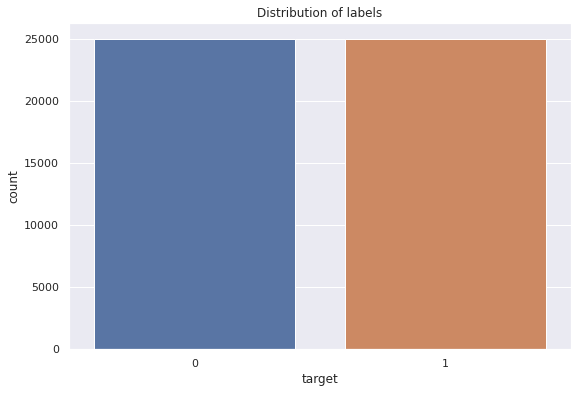

In [5]:
def plot_distrib(df):
    labels = df['target'].unique()
    plt.figure(figsize=(9,6))
    plt.title('Distribution of labels')
    sns.countplot(x=df['target'])
    plt.show();
    
plot_distrib(df)

In [6]:
# well, the dataset is perfectly balanced !!!!

### compute the stats regarding text lengths

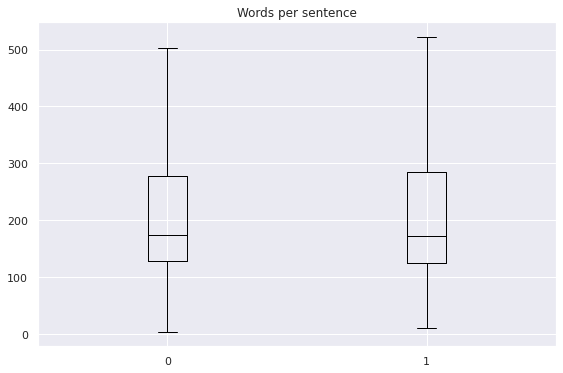

In [7]:
df["Words per sentence"] = df["text"].str.split().apply(len)
df.boxplot("Words per sentence", by="target", grid=True, showfliers=False,
           color="black", figsize=(9,6))
plt.suptitle("")
plt.xlabel("")
plt.show();

In [8]:
# after looking at these stats it is good to set max_length = 300 (75 percentile)
# some improvments could be obtained with 500 (100%)